In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import RabbitAssist as RA
import datetime
from sklearn.model_selection import train_test_split

## Part 1. Numerical Indicators as Features

In [2]:
# choose 10-year Taiex as data
df = yf.download('^TWII', '2014-01-01', '2023-12-31')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,8618.599609,8632.809570,8587.540039,8612.540039,8612.507812,2537600
2014-01-03,8584.740234,8584.740234,8537.860352,8546.540039,8546.507812,2539700
2014-01-06,8553.000000,8568.240234,8488.639648,8500.009766,8499.977539,2640100
2014-01-07,8515.360352,8547.190430,8512.299805,8512.299805,8512.267578,2598900
2014-01-08,8548.610352,8587.080078,8548.610352,8556.009766,8555.977539,3206300


In [3]:
df = RA.toIndicators(df, period=10)
df.head()

,Open,High,Low,Close,Adj Close,Volume,sma,wma,mom,stoK,stoD,rsi,macd,lwR,ad,cci
Date,,,,,,,,,,,,,,,,
2014-02-27,8626.509766,8647.900391,8615.410156,8639.580078,8639.547852,2515200,8566.962109,8583.573633,171.879883,94.134049,85.722895,73.928093,-15.317906,-5.865951,1.447821,159.824181
2014-03-03,8627.150391,8628.049805,8545.240234,8601.980469,8601.948242,2549200,8575.792187,8589.940607,88.300781,67.625736,84.996443,62.586373,-9.986915,-32.374264,-0.139238,46.291172
2014-03-04,8583.580078,8595.589844,8554.540039,8554.540039,8554.507812,2380400,8579.291211,8586.076580,34.990234,34.179490,79.824085,54.459063,-5.985267,-65.820510,-0.155680,-29.271786
2014-03-05,8622.190430,8652.219727,8622.190430,8632.929688,8632.897461,2453300,8586.961133,8595.829031,76.699219,86.136203,78.757432,58.835123,-1.881245,-13.863797,3.252813,137.830979
2014-03-06,8660.290039,8719.169922,8660.290039,8713.790039,8713.757812,2719200,8600.639160,8618.888832,136.780273,97.389545,78.496386,63.840245,3.265268,-2.610455,1.464681,195.078784


In [4]:
df['Return'] = df['Close'].pct_change()
df = df.assign(Movement=df['Return'].apply(lambda x: 1 if x > 0 else 0))
df['Future_Movement'] = df['Movement'].shift(-1)
df = df.dropna()
df.head()

C:\Users\chen2\AppData\Local\Temp\ipykernel_20352\4025459608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Return'] = df['Close'].pct_change()


,Open,High,Low,Close,Adj Close,Volume,sma,wma,mom,stoK,stoD,rsi,macd,lwR,ad,cci,Return,Movement,Future_Movement
Date,,,,,,,,,,,,,,,,,,,
2014-03-03,8627.150391,8628.049805,8545.240234,8601.980469,8601.948242,2549200,8575.792187,8589.940607,88.300781,67.625736,84.996443,62.586373,-9.986915,-32.374264,-0.139238,46.291172,-0.004352,0,0.0
2014-03-04,8583.580078,8595.589844,8554.540039,8554.540039,8554.507812,2380400,8579.291211,8586.076580,34.990234,34.179490,79.824085,54.459063,-5.985267,-65.820510,-0.155680,-29.271786,-0.005515,0,1.0
2014-03-05,8622.190430,8652.219727,8622.190430,8632.929688,8632.897461,2453300,8586.961133,8595.829031,76.699219,86.136203,78.757432,58.835123,-1.881245,-13.863797,3.252813,137.830979,0.009164,1,1.0
2014-03-06,8660.290039,8719.169922,8660.290039,8713.790039,8713.757812,2719200,8600.639160,8618.888832,136.780273,97.389545,78.496386,63.840245,3.265268,-2.610455,1.464681,195.078784,0.009367,1,1.0
2014-03-07,8754.740234,8787.620117,8698.599609,8713.959961,8713.927734,3139500,8619.573145,8639.492614,189.339844,70.053162,77.882184,71.422416,8.825147,-29.946838,0.829360,171.582283,0.000020,1,0.0


In [8]:
df['Return'].describe()

count    2400.000000
mean        0.000350
std         0.009568
min        -0.063125
25%        -0.004307
50%         0.000711
75%         0.005695
max         0.063671
Name: Return, dtype: float64

Text(0.5, 1.0, 'Taiex Return Frequency')

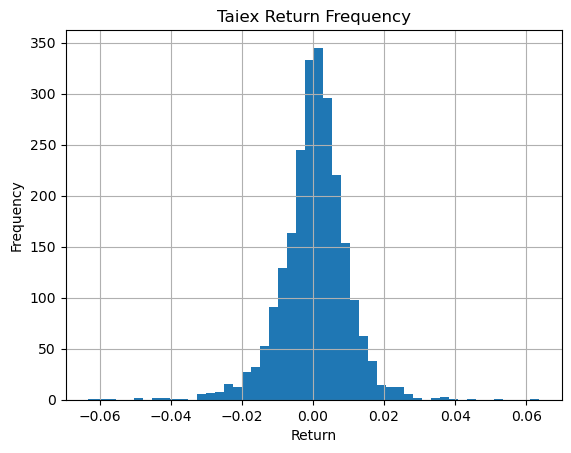

In [7]:
df['Return'].hist(bins=50)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title('Taiex Return Frequency')

In [11]:
# count upward and downward movements per year
whole_result = RA.annualSummary(df)
print(whole_result)

      Increase  Increase (%)  Decrease  Decrease (%)  Total
Date                                                       
2014       112      0.525822       101      0.474178    213
2015       119      0.487705       125      0.512295    244
2016       137      0.566116       105      0.433884    242
2017       137      0.563786       106      0.436214    243
2018       127      0.518367       118      0.481633    245
2019       139      0.576763       102      0.423237    241
2020       141      0.575510       104      0.424490    245
2021       129      0.530864       114      0.469136    243
2022       117      0.475610       129      0.524390    246
2023       145      0.609244        93      0.390756    238


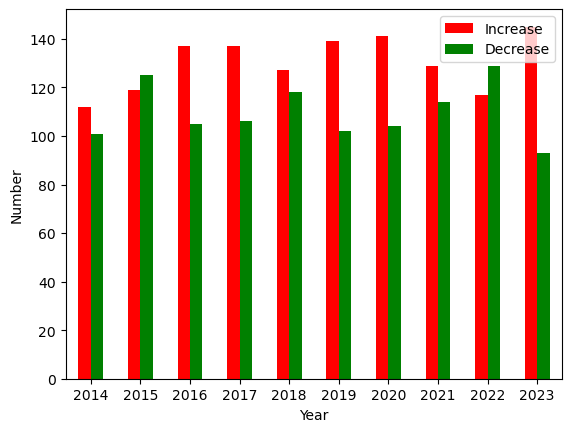

In [13]:
whole_result[['Increase', 'Decrease']].plot.bar(rot=0, color=['r', 'g'])
plt.xlabel('Year')
plt.ylabel('Number')
plt.show()

In [17]:
## treat returns within a range as noisy and filter them out 
# upper_threshold = df['Return'].mean() + df['Return'].std()
# lower_threshold = df['Return'].mean() - df['Return'].std()
# filtered_df = df[(df['Return']>upper_threshold)|(df['Return']<lower_threshold)]
# filtered_df
# lower_threshold, upper_threshold

(-0.009218150084545256, 0.009917541269520694)

In [9]:
df[['Close', 'Return', 'Movement', 'Future_Movement']].head(10)

,Close,Return,Movement,Future_Movement
Date,,,,
2014-03-03,8601.980469,-0.004352,0,0.0
2014-03-04,8554.540039,-0.005515,0,1.0
2014-03-05,8632.929688,0.009164,1,1.0
2014-03-06,8713.790039,0.009367,1,1.0
2014-03-07,8713.959961,0.000020,1,0.0
2014-03-10,8665.240234,-0.005591,0,1.0
2014-03-11,8702.330078,0.004280,1,0.0
2014-03-12,8684.730469,-0.002022,0,1.0
2014-03-13,8747.790039,0.007261,1,0.0


In [12]:
# calculate ten indicators 
indicators_arr = ['sma', 'wma', 'mom', 'stoK', 'stoD', 'rsi', 'macd', 'lwR', 'ad', 'cci']
df.describe()[indicators_arr]

,sma,wma,mom,stoK,stoD,rsi,macd,lwR,ad,cci
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,11957.409461,11963.090956,37.986182,58.954115,58.961779,54.709715,25.309557,-41.045885,0.586721,17.304181
std,3123.849664,3126.652051,401.328504,31.782643,22.615555,20.306140,130.848120,31.782643,0.675796,104.285853
min,7767.173975,7755.687438,-2833.480469,0.000000,7.906622,0.897673,-541.058429,-100.000000,-2.270536,-291.153045
25%,9373.780933,9377.423335,-152.424072,30.492972,42.074978,39.566731,-39.930292,-69.507028,0.132958,-67.031275
50%,10769.845020,10773.789205,67.715332,64.672101,61.520925,55.598442,34.511343,-35.327899,0.566485,37.113852
75%,14946.280566,14937.856645,254.305176,88.062891,77.872890,70.364746,95.434418,-11.937109,1.063680,102.267440
max,18383.268164,18386.233558,1714.540039,100.000000,96.303584,97.881351,422.422182,0.000000,3.844339,272.699381


In [15]:
# perform stratified sampling on movement directions each year to derive parameter selection data
year_index = df.index.year.unique().astype(str)
para_selec_set = pd.DataFrame()
for year in year_index:
    temp, annual_df = train_test_split(df.loc[year], test_size=0.2, stratify=df.loc[year, 'Movement'], random_state=42)
    para_selec_set = pd.concat([para_selec_set, annual_df])
para_selec_set.head()

,Open,High,Low,Close,Adj Close,Volume,sma,wma,mom,stoK,stoD,rsi,macd,lwR,ad,cci,Return,Movement,Future_Movement
Date,,,,,,,,,,,,,,,,,,,
2014-05-29,9123.459961,9131.660156,9093.570312,9109.000000,9108.965820,2347400,8983.853027,9028.714897,228.349609,92.800362,81.134331,84.732042,33.522385,-7.199638,0.261230,109.048094,-0.001393,0,0.0
2014-05-19,8901.540039,8912.349609,8877.459961,8899.900391,8899.867188,1798700,8879.691211,8875.770295,29.470703,67.841470,59.962762,54.716963,16.154227,-32.158530,0.685000,53.270026,0.001288,1,0.0
2014-08-18,9222.730469,9222.730469,9128.660156,9141.309570,9141.275391,1992200,9164.887988,9177.258984,-188.880859,41.870514,33.381688,31.269949,-44.412049,-58.129486,0.169245,-6.979074,-0.007114,0,1.0
2014-10-29,8821.849609,8903.679688,8821.849609,8903.679688,8903.646484,2169000,8689.526953,8726.201012,248.169922,100.000000,45.212847,65.656830,-124.726659,0.000000,1.590245,178.255768,0.014832,1,0.0
2014-11-05,8997.759766,9013.059570,8941.179688,8962.599609,8962.566406,1633400,8850.155957,8913.422994,213.769531,80.951671,78.950964,68.698918,-69.391731,-19.048329,0.332219,70.645676,-0.002957,0,0.0


In [18]:
# check the proportion of movements each year in the parameter selection data
para_result = RA.annualSummary(para_selec_set)
print('Parameter Selection Data')
print(para_result)
print('Population')
print(whole_result)

Parameter Selection Data
      Increase  Increase (%)  Decrease  Decrease (%)  Total
Date                                                       
2014        23      0.534884        20      0.465116     43
2015        24      0.489796        25      0.510204     49
2016        28      0.571429        21      0.428571     49
2017        28      0.571429        21      0.428571     49
2018        25      0.510204        24      0.489796     49
2019        28      0.571429        21      0.428571     49
2020        28      0.571429        21      0.428571     49
2021        26      0.530612        23      0.469388     49
2022        24      0.480000        26      0.520000     50
2023        29      0.604167        19      0.395833     48
Population
      Increase  Increase (%)  Decrease  Decrease (%)  Total
Date                                                       
2014       112      0.525822       101      0.474178    213
2015       119      0.487705       125      0.512295    244
2016

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_validate

In [21]:
#x = filtered_df[indicators_arr]
#y = filtered_df['Future_Movement']
x = para_selec_set[indicators_arr]
y = para_selec_set['Future_Movement']
scaler = MinMaxScaler(feature_range=(-1, 1))
norm_x = scaler.fit_transform(x)

In [22]:
# SVM
grid_search = GridSearchCV(estimator=SVC(), param_grid=[
                {'kernel': ['poly'], 'degree': [1, 2, 3, 4, 5], 'C': [0.5, 1, 5, 10, 100]},
                {'kernel': ['rbf'], 'gamma': np.arange(0, 10.5, 0.5), 'C': [0.5, 1, 5, 10]},
            ], cv=5, scoring=('accuracy', 'f1'), refit='accuracy', n_jobs=-1)
grid_result = grid_search.fit(norm_x, y)

print("Best accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best accuracy: 0.555820 using {'C': 0.5, 'degree': 5, 'kernel': 'poly'}


In [23]:
# Random Forest
n_estimators = np.arange(10, 310, 10)
param_grid = dict(n_estimators=n_estimators)
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid,
                           cv=5, scoring=('accuracy', 'f1'), refit='accuracy', n_jobs=-1)
grid_result = grid_search.fit(norm_x, y)

print("Best accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best accuracy: 0.572165 using {'n_estimators': 10}


## Part 2. Trend Deterministic Data as Features

In [25]:
trend_df = RA.indicToTrend(df)
trend_df.head()

,sma,wma,mom,stoK,stoD,rsi,macd,lwR,ad,cci,Close,Return,Movement,Future_Movement
Date,,,,,,,,,,,,,,
2014-03-04,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8554.540039,-0.005515,0,1.0
2014-03-05,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,8632.929688,0.009164,1,1.0
2014-03-06,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,8713.790039,0.009367,1,1.0
2014-03-07,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8713.959961,0.000020,1,0.0
2014-03-10,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8665.240234,-0.005591,0,1.0


In [26]:
year_index = trend_df.index.year.unique().astype(str)
para_selec_set = pd.DataFrame()
for year in year_index:
    temp, annual_df = train_test_split(trend_df.loc[year], test_size=0.2, stratify=trend_df.loc[year, 'Movement'], random_state=42)
    para_selec_set = pd.concat([para_selec_set, annual_df])
para_selec_set.head()

,sma,wma,mom,stoK,stoD,rsi,macd,lwR,ad,cci,Close,Return,Movement,Future_Movement
Date,,,,,,,,,,,,,,
2014-05-30,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,9075.910156,-0.003633,0,1.0
2014-05-19,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,8899.900391,0.001288,1,0.0
2014-08-21,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9253.379883,-0.003733,0,1.0
2014-10-29,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,8903.679688,0.014832,1,0.0
2014-11-06,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,8891.019531,-0.007987,0,1.0


In [27]:
trend_x = para_selec_set[indicators_arr]
y = para_selec_set['Future_Movement']
scaler = MinMaxScaler(feature_range=(-1, 1))
norm_trend_x = scaler.fit_transform(trend_x)

In [28]:
# SVM
grid_search = GridSearchCV(estimator=SVC(), param_grid=[
                {'kernel': ['poly'], 'degree': [1, 2, 3, 4, 5], 'C': [0.5, 1, 5, 10, 100]},
                {'kernel': ['rbf'], 'gamma': np.arange(0, 10.5, 0.5), 'C': [0.5, 1, 5, 10]},
            ], cv=5, scoring=('accuracy', 'f1'), refit='accuracy', n_jobs=-1)
grid_result = grid_search.fit(norm_trend_x, y)

print("Best accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best accuracy: 0.572315 using {'C': 0.5, 'degree': 5, 'kernel': 'poly'}


In [29]:
# Random Forest
n_estimators = np.arange(10, 310, 10)
param_grid = dict(n_estimators=n_estimators)
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid,
                           cv=5, scoring=('accuracy', 'f1'), refit='accuracy', n_jobs=-1)
grid_result = grid_search.fit(norm_trend_x, y)

print("Best accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best accuracy: 0.545447 using {'n_estimators': 40}


總結: 不管是以數值型態的技術指標，或是轉成漲跌趨勢(0或1)型態的trend deterministic data，其實結果都沒有論文中宣稱的七~八成準確率來的高，
甚至後者也沒有論文所宣稱的能顯著提高準確率，整體準確率都只有五成五左右，我認為是不太理想(跟亂猜差不多)。雖然是用小樣本來訓練模型，但是都有對每年來分層抽樣，基本上我認為是有一定的代表性。自己後來有實驗過，我認為兩篇論文中在預測的應該是當下的movement，而非未來的movement(很妙的是兩篇論文都沒有詳細提到output是什麼時候的movement)，如果真的是這樣的話，那我認為這兩篇論文就沒有太多的用意，畢竟都已經知道現在的資訊了，再來預測現在的漲跌有點...，不過把數值型技術指標轉成漲跌趨勢的概念，也確實提供不一樣的思考面向。